## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

## Load Data

In [15]:
import pandas as pd

FILE_PATH = "/Users/sofiarodriguezmorales/Documents/UCAB/10mo/AI/handson-ml2/Proyecto_1/"

def load_housing_data(housing_path=FILE_PATH):
    csv_path = os.path.join(housing_path, "homes.csv")
    return pd.read_csv(csv_path)

In [16]:
data = load_housing_data()

In [18]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Create a Test Set

In [19]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [80]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2)
len(train_set)

13832

In [25]:
len(test_set)

4323

In [78]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)
# x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(data, test_size=0.2, random_state=42)

In [72]:
data["price_cat"] = pd.cut(data["price"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]
                             )

In [74]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["price_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

## Visualize Data

<AxesSubplot:xlabel='long', ylabel='lat'>

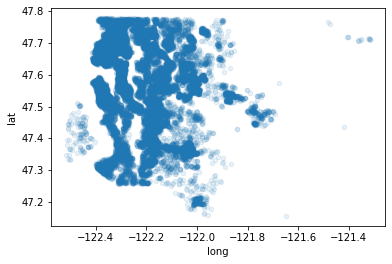

In [38]:
import matplotlib.pyplot as plt

data.plot(kind="scatter", x="long", y="lat", alpha=0.1)

In [54]:
def plot_comparison(col, divider):
    data.plot(kind="scatter", x="long", y="lat", alpha=0.4,
                 s=data[col]/divider, label=col, figsize=(10,7),
                 c="price", cmap=plt.get_cmap("jet"), colorbar=True,
                 sharex=False)
    plt.legend()

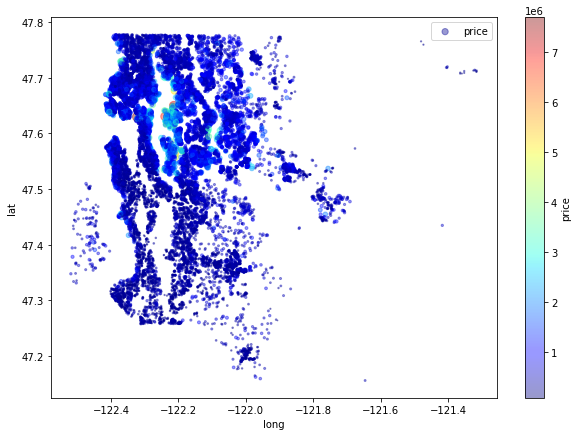

In [59]:
plot_comparison("price", 100000)

## Looking for Correlations

In [60]:
corr_matrix = data.corr()

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='yr_built', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='yr_built', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='floors', ylabel='bathrooms'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='yr_built', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='floors', ylabel='bedrooms'>],
       [<AxesSubplot:xlabel='price', ylabel='yr_built'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='yr_built'>,
 

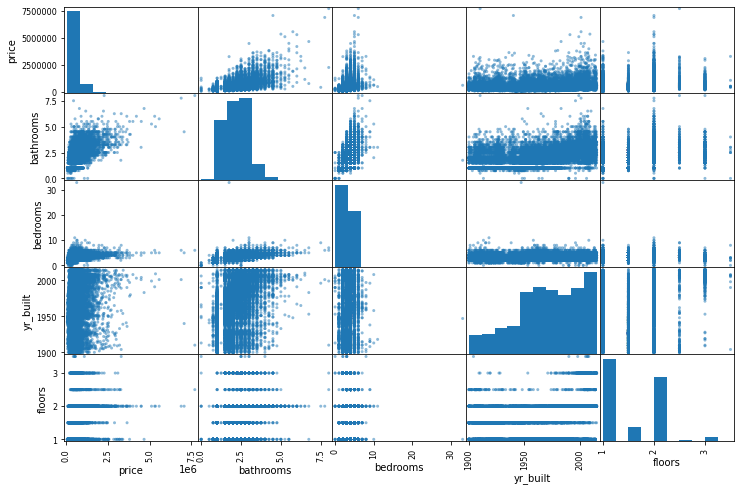

In [66]:
from pandas.plotting import scatter_matrix

attributes = ["price", "bathrooms", "bedrooms",
              "yr_built", "floors"]
scatter_matrix(data[attributes], figsize=(12, 8))

## Prepare the Data for Machine Learning

In [75]:
data = strat_train_set.drop("price", axis=1)
data_labels = strat_train_set["price"].copy()

In [85]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [87]:
data_num = data.drop("date", axis=1)

In [89]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [91]:
X = imputer.transform(data_num)

In [92]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=data.id)

## Transformation Pipeline

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

data_num_tr = num_pipeline.fit_transform(data_num)

data_num_tr

array([[-1.38055354, -0.39653183, -0.14529526, ..., -0.68340892,
        -0.39026012,  0.        ],
       [ 1.47774972, -0.39653183, -0.46977926, ..., -0.77102794,
        -0.33670965,  0.        ],
       [-0.05632194,  0.66806994,  1.47712471, ...,  1.97436799,
         1.33444709,  0.        ],
       ...,
       [-1.30704705,  0.66806994,  0.17918873, ...,  0.45563833,
        -0.21829626,  0.        ],
       [-0.31660419, -0.39653183,  0.50367273, ...,  0.70389221,
        -0.28683205,  0.        ],
       [-0.04024984,  0.66806994, -0.46977926, ..., -0.46436138,
        -0.31026497,  0.        ]])

In [97]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

data_prepared = full_pipeline.fit_transform(data)

## Training

In [98]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

## Evaluation on Training Set

In [99]:
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 346552.12581384  568046.8024603  1240334.55806013 1146713.72838241
  422786.16696749]


In [100]:
print("Labels:", list(some_labels))

Labels: [335000.0, 763101.0, 970000.0, 1920000.0, 391000.0]


In [102]:
some_data_prepared

array([[-1.38055354, -0.39653183, -0.14529526, -0.80594685, -0.31421587,
        -0.90984976, -0.08969788, -0.30768488, -0.62723264, -1.40839911,
        -1.34979559,  0.8526475 , -1.90139558, -0.20934943,  1.22759272,
         0.11734814, -0.6726254 , -0.68340892, -0.39026012,  0.        ],
       [ 1.47774972, -0.39653183, -0.46977926, -0.09941892, -0.22890358,
        -0.90984976, -0.08969788, -0.30768488,  0.90821298, -0.55710666,
        -0.83124919,  1.34910566, -1.08347404, -0.20934943,  0.50006763,
         0.75098096, -0.51643456, -0.77102794, -0.33670965,  0.        ],
       [-0.05632194,  0.66806994,  1.47712471,  2.88973772,  1.44164771,
         0.94580372, -0.08969788, -0.30768488, -0.62723264,  1.9967707 ,
         3.55830638, -0.65929325,  0.55236905, -0.20934943, -0.05956705,
         0.2387282 ,  1.01707553,  1.97436799,  1.33444709,  0.        ],
       [-0.74461601,  0.66806994,  0.50367273,  1.07450442,  0.45312197,
        -0.90984976, -0.08969788,  3.56225078,  

In [103]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

205061.0879167281

In [104]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(random_state=42)

In [106]:
data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

9555.808482022014

## Cross Validation

In [110]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [111]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [184030.93069419 177291.8857793  181362.71713708 195272.42956524
 229143.89468058 194438.2844227  167008.88587195 169111.7214091
 178156.96844501 248185.769419  ]
Mean: 192400.34874241598
Standard deviation: 25069.116285504097


In [112]:
lin_scores = cross_val_score(lin_reg, data_prepared, data_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [202365.9279412  177090.64097667 199680.24560758 219142.36544938
 188713.83417218 244482.26932663 182202.627577   195159.86144135
 194570.97735812 243983.86131911]
Mean: 204739.26111692243
Standard deviation: 22544.711924888765


In [114]:
data_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

49488.14961360642

In [115]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, data_prepared, data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [136954.18236315 117596.45589072 123438.94402513 131229.67720192
 143081.80628979 148766.42169098 109840.53609581 114445.48098535
 112884.20169445 163568.34240801]
Mean: 130180.60486453108
Standard deviation: 16846.024422374463


In [116]:
scores = cross_val_score(lin_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count        10.000000
mean     204739.261117
std       23764.212958
min      177090.640977
25%      190178.119969
50%      197420.053524
75%      214948.256072
max      244482.269327
dtype: float64

In [117]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(data_prepared, data_labels)
housing_predictions = svm_reg.predict(data_prepared)
svm_mse = mean_squared_error(data_labels, data_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

49488.14961360642

## Creating a Grid Search

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_prepared, data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [119]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [120]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [121]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

191988.42258438398 {'max_features': 2, 'n_estimators': 3}
160030.75251314492 {'max_features': 2, 'n_estimators': 10}
150474.70606522774 {'max_features': 2, 'n_estimators': 30}
178263.04520045765 {'max_features': 4, 'n_estimators': 3}
150697.40797277278 {'max_features': 4, 'n_estimators': 10}
143300.93089047875 {'max_features': 4, 'n_estimators': 30}
171866.5201722998 {'max_features': 6, 'n_estimators': 3}
148894.75458667375 {'max_features': 6, 'n_estimators': 10}
138203.60718249923 {'max_features': 6, 'n_estimators': 30}
162556.84598433113 {'max_features': 8, 'n_estimators': 3}
148163.86835898098 {'max_features': 8, 'n_estimators': 10}
140342.18642643635 {'max_features': 8, 'n_estimators': 30}
183910.16430704074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
159784.61489446313 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
172430.10122127717 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
147866.07357207246 {'bootstrap': False, 'max_features': 3, 'n_

In [122]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051830,0.004956,0.003278,0.000205,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.232036e+10,-4.043364e+10,...,-3.685955e+10,3.333449e+09,18,-9.267542e+09,-8.951234e+09,-9.273705e+09,-8.840881e+09,-9.355161e+09,-9.137705e+09,2.027396e+08
1,0.166165,0.002832,0.009503,0.000246,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.130769e+10,-2.829777e+10,...,-2.560984e+10,3.142067e+09,11,-4.865021e+09,-4.957653e+09,-5.010612e+09,-4.902918e+09,-4.977652e+09,-4.942771e+09,5.229515e+07
2,0.636632,0.069926,0.050258,0.028889,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-1.861506e+10,-2.308840e+10,...,-2.264264e+10,3.459070e+09,8,-3.737199e+09,-3.566043e+09,-3.656818e+09,-3.784490e+09,-3.759125e+09,-3.700735e+09,7.978043e+07
3,0.084251,0.009431,0.003701,0.000969,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-2.841909e+10,-3.359437e+10,...,-3.177771e+10,4.808752e+09,16,-8.196442e+09,-8.888861e+09,-7.846328e+09,-7.922474e+09,-8.643146e+09,-8.299450e+09,4.058506e+08
4,0.300839,0.032062,0.010095,0.001177,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.035384e+10,-2.168912e+10,...,-2.270971e+10,3.935782e+09,9,-3.965232e+09,-4.002584e+09,-4.061265e+09,-4.417694e+09,-4.332748e+09,-4.155905e+09,1.836449e+08
5,0.777290,0.016948,0.028786,0.001912,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-1.772034e+10,-2.075120e+10,...,-2.053516e+10,3.358306e+09,3,-3.054728e+09,-3.083055e+09,-3.142551e+09,-3.368426e+09,-3.204786e+09,-3.170709e+09,1.115175e+08
6,0.107672,0.003812,0.003353,0.000298,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-2.587810e+10,-3.039889e+10,...,-2.953810e+10,4.505661e+09,14,-7.129705e+09,-7.794007e+09,-8.020391e+09,-7.104505e+09,-6.241029e+09,-7.257927e+09,6.233448e+08
7,0.348304,0.006411,0.009604,0.000442,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.144433e+10,-2.084255e+10,...,-2.216965e+10,3.375901e+09,7,-3.801924e+09,-3.563829e+09,-3.899667e+09,-4.209167e+09,-3.786508e+09,-3.852219e+09,2.096089e+08
8,1.148229,0.113627,0.028451,0.002027,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-1.800973e+10,-1.829409e+10,...,-1.910024e+10,2.806892e+09,1,-2.837266e+09,-2.900974e+09,-2.873323e+09,-3.437084e+09,-2.914426e+09,-2.992615e+09,2.237983e+08
9,0.140262,0.007066,0.003379,0.000507,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-2.837041e+10,-2.460527e+10,...,-2.642473e+10,3.680108e+09,12,-6.257659e+09,-7.131315e+09,-5.985570e+09,-6.556495e+09,-7.021669e+09,-6.590542e+09,4.373252e+08


## Evaluation on Test Set

In [123]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [124]:
final_rmse

121190.3049915336

In [125]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)
))

array([112117.42919172, 129629.71156075])

In [126]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([112117.42919172, 129629.71156075])

In [128]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(112117.4291917179, 129629.71156074516)